In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

#num_words 1000 means there could be lacs of total words from every sentence of reviews, so in order to make vector feasible, we took out frequency of each 
#word , and took top 1000 words used during revies, sice they are text we have to the one hot encoding of it
# we will arrange them giving them index, no each word will have a vector of 1000 size 1 AT ITS INDEX N rest zeros, if we would have taken lacs words the matrix's size would also be so

In [5]:
train_data[0]
#index honge jin words use krk ye ye review dia

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
len(train_data[0])
#218 words ka review hai ye ek

218

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

#we decoded this via code

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
train_labels[0]
#since labels are only two 0 for neg n 1 for posi we don't have to hot encode them

1

In [12]:
# we r hot encodeing it here in digits classif we used  to_categorical, can use it here as well
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
  return results

In [13]:
x_train = vectorize_sequences(train_data)

In [14]:
x_test = vectorize_sequences(test_data)

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
#no need to hot encode labels

In [18]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#sigmoid retrns probability

In [19]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
# for binary we use binary_crossentropy

In [22]:
#now if u want to configure otimizer like LR can be given.like this
from tensorflow import keras
from keras import optimizers
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
#u can alo configure loss func as well

# now we ae doing vaidation
#when u have train data and test data both given to model n then u want to make some changes to model,
# 
# now the test data was unsen in first time , now it is not that could lessen reliability

# for this we do validation
# what we do is we take small amount of data more from train data an take test at each iteration simulataneously during training
# by this we can have idea...
# just like class test bfr final exam





In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [24]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))
#its taking time and showing val_acc accuracy of validation

#saving it in history

Epoch 1/20
30/30 [==============================] - 3s 80ms/step - loss: 0.5168 - acc: 0.7869 - val_loss: 0.3843 - val_acc: 0.8732
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3050 - acc: 0.9017 - val_loss: 0.3022 - val_acc: 0.8901
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2208 - acc: 0.9299 - val_loss: 0.2788 - val_acc: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1749 - acc: 0.9437 - val_loss: 0.2769 - val_acc: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1416 - acc: 0.9553 - val_loss: 0.2808 - val_acc: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1163 - acc: 0.9645 - val_loss: 0.3148 - val_acc: 0.8790
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0974 - acc: 0.9703 - val_loss: 0.3109 - val_acc: 0.8821
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0786 - a

In [26]:
#via history obj we are getting in history dictionary from hisory variable
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

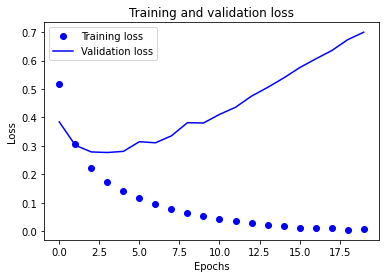

In [29]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(20)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#ab mzeed  epochs hote to  loss neeche se upr chlajata yani jo diff krte hue dekha tha

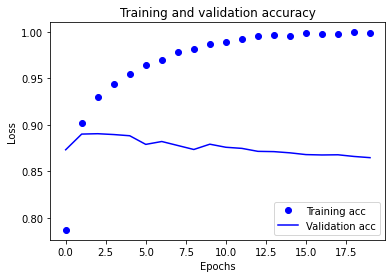

In [31]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values , 'bo', label='Training acc')
plt.plot(epochs, val_acc_values , 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
#now we have seen from validation that 4 epochs are best  512 BS is good
#now from scratch

In [34]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)


results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4700 - accuracy: 0.8138
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2708 - accuracy: 0.9081
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2067 - accuracy: 0.9284
Epoch 4/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1735 - accuracy: 0.9380
result
782/782 [==============================] - 2s 2ms/step - loss: 0.2982 - accuracy: 0.8807


In [35]:
#After having trained a network, you’ll want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the predict method:
model.predict(x_test)
#now this x_test can be replaced by any review u can give but must be passed through thr process of that encoding etc

array([[0.17854679],
       [0.9988362 ],
       [0.7979467 ],
       ...,
       [0.11244729],
       [0.059273  ],
       [0.5436355 ]], dtype=float32)

In [ ]:
# As you can see, the network is confident for some samples (0.99 or more, or 0.01 or
# less) but less confident for others (0.6, 0.4).